In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [220]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [221]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [223]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [224]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

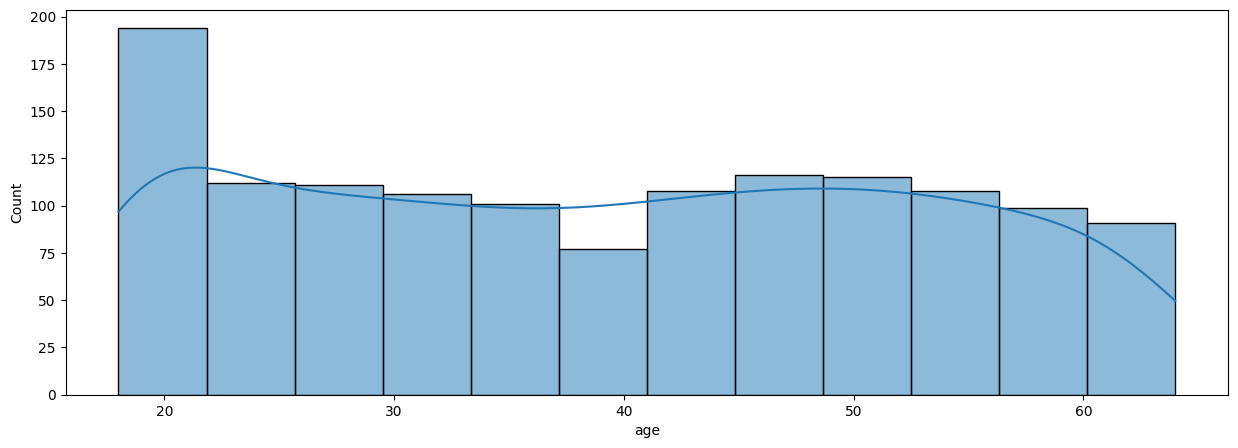

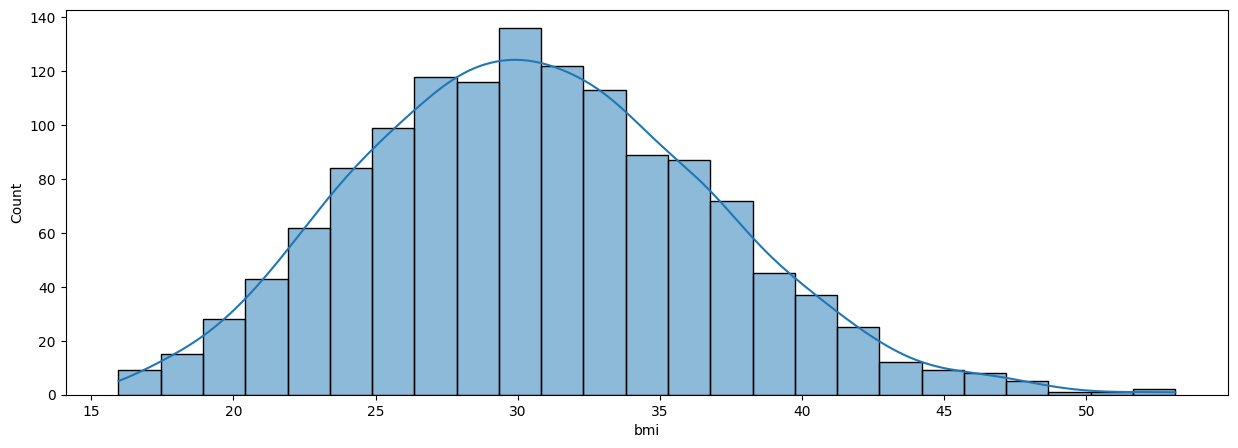

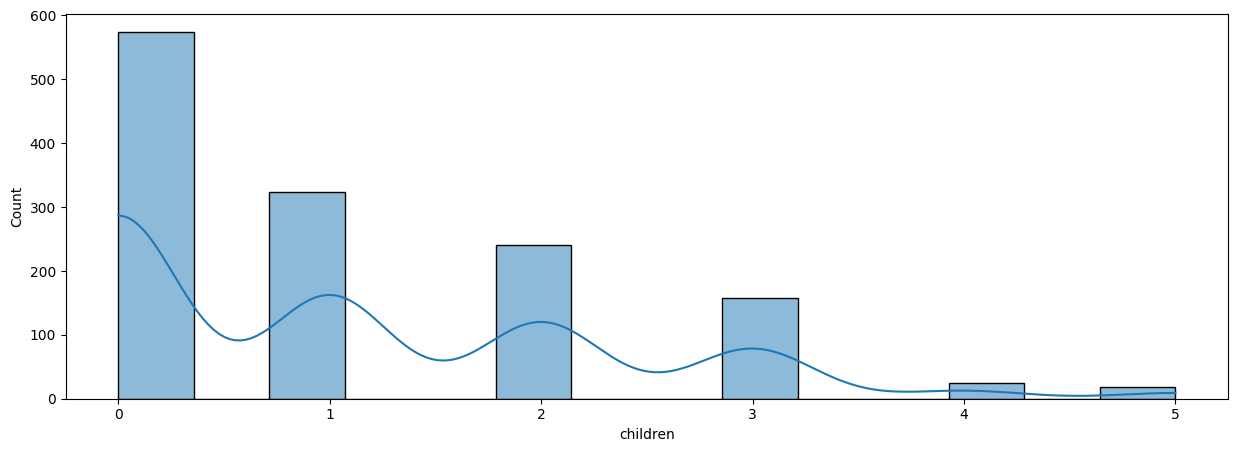

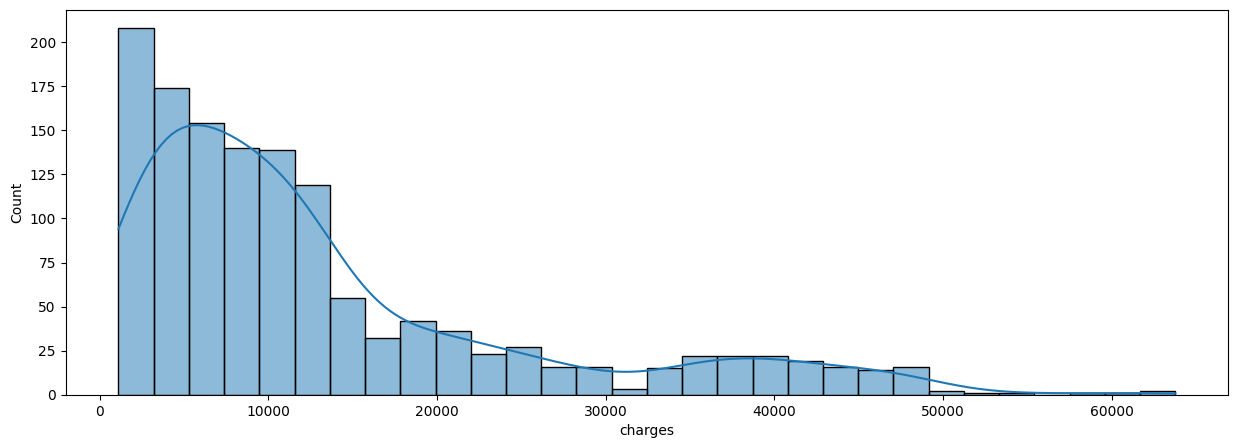

In [225]:
"""Visualizing numerical columns"""
def num(df, columns):
    for col in columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[col], kde=True)
num(df, ["age","bmi","children","charges"])

### Consider Log Transforming the charges

In [226]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

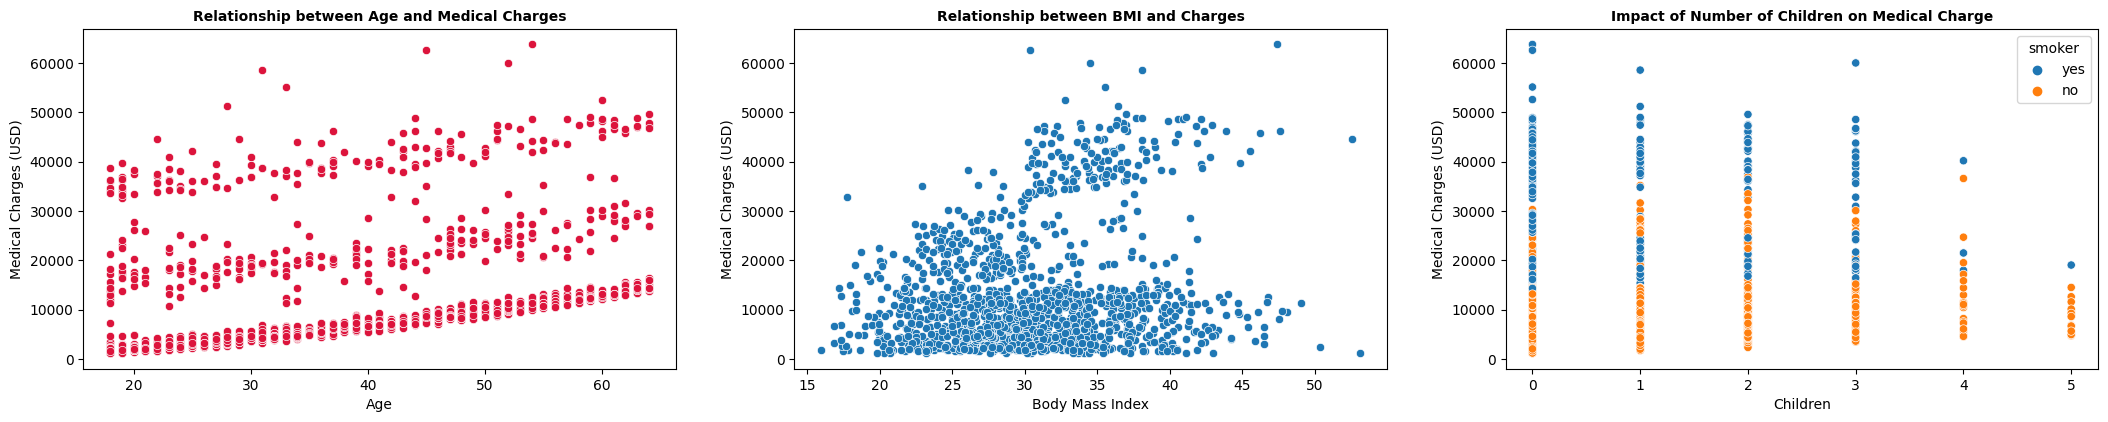

In [227]:
"""Look at their relationship"""
plt.figure(figsize=(26,15))

#Charges vs Age
plt.subplot(3,3,1)
sns.scatterplot(df, x="age", y="charges", color="crimson")
plt.title("Relationship between Age and Medical Charges",fontsize=10, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Medical Charges (USD)")

#Charges vs BodyMassIndex
plt.subplot(3,3,2)
sns.scatterplot(df, x="bmi", y="charges")
plt.title("Relationship between BMI and Charges", fontsize=10, fontweight="bold")
plt.xlabel("Body Mass Index")
plt.ylabel("Medical Charges (USD)")


#Charges vs Children
plt.subplot(3,3,3)
sns.scatterplot(df, x="children", y="charges", hue= "smoker",color="forestgreen")
plt.title("Impact of Number of Children on Medical Charge", fontsize=10, fontweight="bold")
plt.xlabel("Children")
plt.ylabel("Medical Charges (USD)")


plt.show()

### The older a person gets the higher his medical charges are

In [228]:
"""Not Necessary but trying to see if has impact on the model"""

df["log_charges"] = np.log1p(df["charges"])

In [229]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


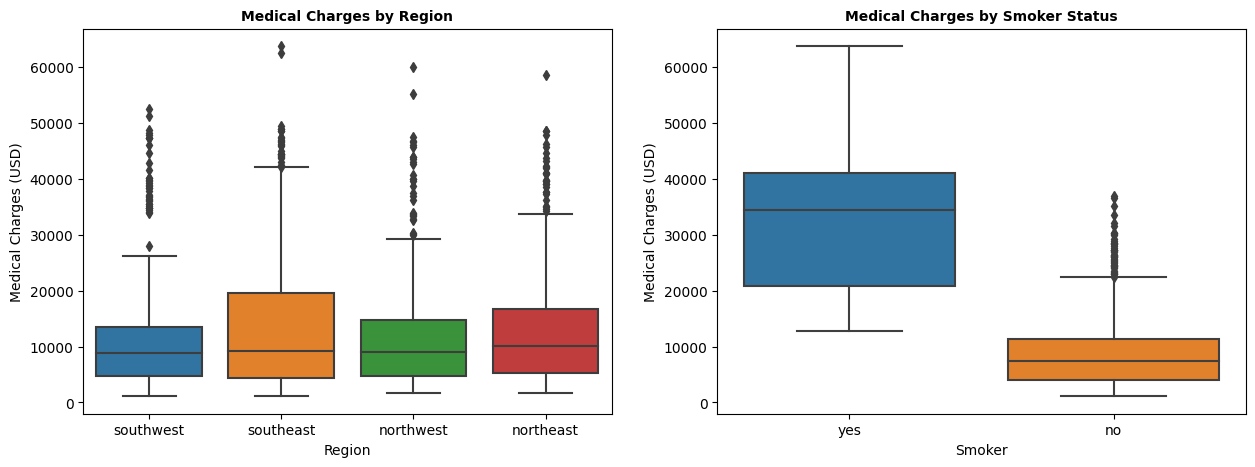

In [230]:
plt.figure(figsize=(15, 5))  # Set figure size to fit both plots side by side

# Boxplot: Charges vs Region
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="region", y="charges")
plt.title("Medical Charges by Region", fontsize=10, fontweight="bold")
plt.xlabel("Region")
plt.ylabel("Medical Charges (USD)")

# Boxplot: Charges vs Smoker Status
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Medical Charges by Smoker Status", fontsize=10, fontweight="bold")
plt.xlabel("Smoker")
plt.ylabel("Medical Charges (USD)")

plt.show()


### Smokers pay significantly higher medical expenses than non-smokers.

In [231]:
#Group by to get into more specific
##GROUPBY CHILDREN VS PAID MEDIAN 0,1,2,3,4,5
#CHARGES MEDIAN N AVG for each region or categorical variables
#Age,Region,Smoker
#Sex,Age,Smoker
#BMI, AGE,region
#Parent CHILDREN SMOKE COMBO

<Axes: >

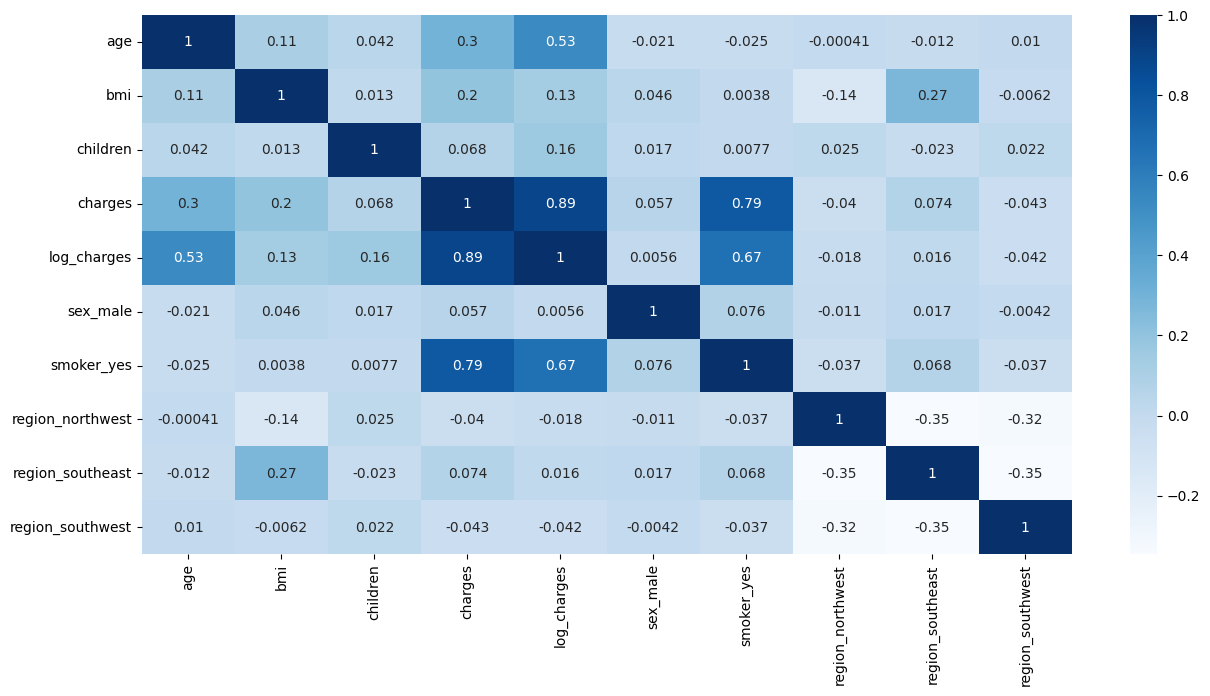

In [232]:
#splitting entire numeric and categorical 
numeric  = df.select_dtypes(include="number")
cat = df.select_dtypes(include="object")
#Onehotencoding
Encode = pd.get_dummies(cat, drop_first=True)
#Correlation matrix
numcorr = numeric.corr()
catcorr = Encode.corr()
"""Concating then Visualizing"""
df2 = pd.concat([numeric, Encode], axis=1)
full = df2.corr()
plt.figure(figsize=(15,7))
sns.heatmap(full, annot=True, cmap="Blues")

In [233]:

features = df2[["bmi","age","children","smoker_yes"]]
target = df2["charges"]
x = features
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [234]:
y_pred = model.predict(x_test)

In [235]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2: 0.7811147722517887
MSE: 33981653.95019775
MAE: 4213.798594527248
RMSE: 5829.378521780666


In [240]:

features = df2[["bmi","age","children","smoker_yes"]].values
target = df2["charges"].values
x = features
y = target



























